Write a program to find the coefficients for a linear regression model for the dataset
provided (data2.txt). Assume a linear model: y = w0 + w1*x. You need to
1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column),
and use Python to implement the following methods to find the coefficients:
2) Normal equation, and
3) Gradient Descent using batch AND stochastic modes respectively:
a) Split dataset into 80% for training and 20% for testing.
b) Plot MSE vs. iteration of each mode for both training set and testing set; compare batch
and stochastic modes in terms of accuracy (of testing set) and speed of convergence. (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)
c) Plot MSE vs. learning rate (using 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1) and determine the best learning rate.

# 1) Plot the data:

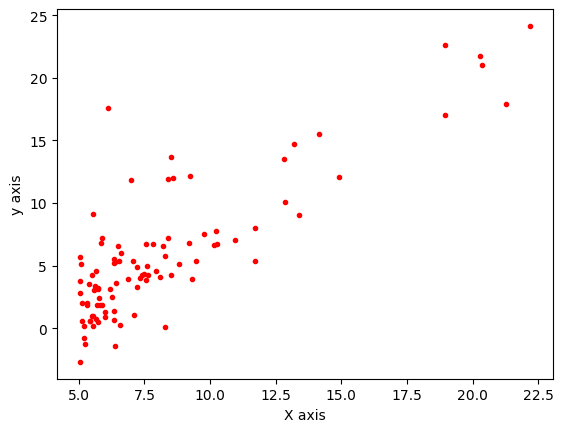

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.loadtxt('data2.txt', delimiter = ',', unpack=True)

plt.plot(x,y,'r.')
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.show()

# 2) Coefficients for Normal Equation

[-3.29379752  1.1477735 ]


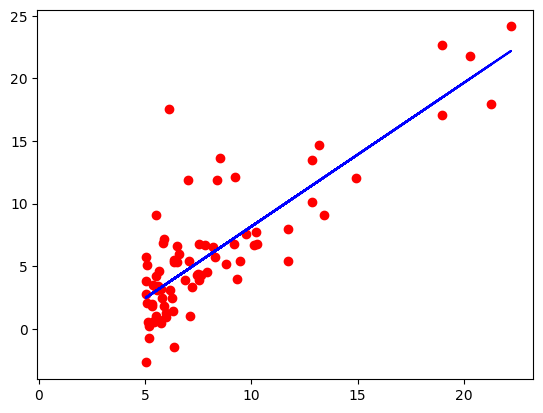

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x, y = np.loadtxt('data2.txt', delimiter = ',', unpack=True)

x_np = np.array(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_np = np.c_[np.ones(len(x_train)), x_train] 
x_temp = np.dot(np.transpose(x_np), x_np)

theta = np.dot(np.linalg.pinv(x_temp), np.dot(np.transpose(x_np), y_train))
print (theta)

y = (theta[1]*x_np) + theta[0]

plt.scatter(x_train, y_train, c='r')
plt.plot(x_np, y, c='b')
plt.show()


**MSE cost function**

In [54]:
#first figure out the MSE cost function

def cost_function(x,y,theta):
    samples = len(x)
    cost_sum = 0.0
    
    for a,b, in zip(x,y):
        feature_vect = np.array([1.0,a])
        cost_sum += (np.dot(theta, feature_vect)-b)**2
    cost = cost_sum / (samples * 2.0)
    
    return cost

**Batch Gradient Descent**

In [55]:
def batch_gd(x,y,theta, alpha, max_iteration, show):
    iteration, m = 0, len(x)
    cost = np.zeros(max_iteration)
    equation = np.zeros([2, max_iteration])
    
    for i in range(1, max_iteration):
        cost[iteration] = cost_function(x,y,theta)
        equation[:, iteration] = theta
        
        if(show == "yes"):
            print("run: " + str(iteration) + " cost: " + str(cost[iteration]))
        
        for a,b in zip(x,y):
            
            feature_vector = np.array([1.0, a])
            y_i = np.dot(theta, np.array([1.0, a]))
            gradient = feature_vector * (b - y_i)
            theta += alpha * gradient/m
        iteration += 1
        
    return theta, cost, equation

In [56]:

theta = np.array([20.0, 80.0])
alpha_batch = 0.01
max_iterations = 200

batch_equation, cost_batch, params_store_batch = batch_gd(x_train, y_train, theta, alpha_batch, max_iterations, "yes")

run: 0 cost: 270728.4910898737
run: 1 cost: 50402.79025152657
run: 2 cost: 9403.874846126662
run: 3 cost: 1773.2919386241977
run: 4 cost: 352.4887413248749
run: 5 cost: 87.63646993586933
run: 6 cost: 38.10431589163025
run: 7 cost: 28.740513333455276
run: 8 cost: 26.896391313874226
run: 9 cost: 26.47138928021125
run: 10 cost: 26.319216803775344
run: 11 cost: 26.221746057735654
run: 12 cost: 26.13629678269788
run: 13 cost: 26.054022208274215
run: 14 cost: 25.972884563021715
run: 15 cost: 25.892334958307853
run: 16 cost: 25.81219741991988
run: 17 cost: 25.732406779393568
run: 18 cost: 25.652936377827952
run: 19 cost: 25.573774451875774
run: 20 cost: 25.49491535061478
run: 21 cost: 25.416356005413743
run: 22 cost: 25.338094454206214
run: 23 cost: 25.260129213205236
run: 24 cost: 25.182459007222366
run: 25 cost: 25.105082653494172
run: 26 cost: 25.027999011554584
run: 27 cost: 24.951206961586063
run: 28 cost: 24.874705395061927
run: 29 cost: 24.79849321069628
run: 30 cost: 24.72256931268585

**Stochastic Gradient Descent**

In [57]:
def stochastic_gd(input_var, output_var, param, alpha, show):
    samples = len(input_var)
    cost = np.zeros(samples)
    equation = np.zeros([2, samples])
    
    iteration = 0
    for x,y in zip(input_var, output_var):
        cost[iteration] = cost_function(input_var, output_var, param)
        equation[:, iteration] = param
        
        if(show == "yes"):
            print("run: " + str(iteration) + " cost: " + str(cost[iteration]))
            
        y_i = np.dot(param, np.array([1.0,x]))
        gradient = np.array([1.0, x]) * (y - y_i)
        param += alpha * gradient/samples
        
        iteration += 1
    return param, cost, equation

In [58]:
theta = np.array([20.0, 80.0])
alpha_stoch = 0.01
stoch_equation, cost, param_store = stochastic_gd(x_train, y_train, theta, alpha_stoch, "yes")

run: 0 cost: 270728.4910898737
run: 1 cost: 266647.0894358208
run: 2 cost: 264688.4350157004
run: 3 cost: 262850.4506420275
run: 4 cost: 259466.361102845
run: 5 cost: 255456.90719918898
run: 6 cost: 253321.12605903443
run: 7 cost: 251557.41743120537
run: 8 cost: 223090.72678693203
run: 9 cost: 217863.0766595474
run: 10 cost: 208662.90746965093
run: 11 cost: 202967.212227976
run: 12 cost: 201410.73492585233
run: 13 cost: 198385.19108758876
run: 14 cost: 195180.909336836
run: 15 cost: 193650.99312681568
run: 16 cost: 173786.14033240246
run: 17 cost: 172370.3142661837
run: 18 cost: 169308.74360756096
run: 19 cost: 168009.29812264306
run: 20 cost: 166196.75892198115
run: 21 cost: 164842.88835483958
run: 22 cost: 163482.87922343446
run: 23 cost: 161651.35007507904
run: 24 cost: 159780.96657390738
run: 25 cost: 153004.70998101597
run: 26 cost: 151067.67241039136
run: 27 cost: 150016.419638681
run: 28 cost: 147925.48473814141
run: 29 cost: 143851.35577124142
run: 30 cost: 140673.3802938354
ru

**We want to see which one is more accurate by comparing the RMS of both modes**

In [62]:
rms_batch = np.sqrt(np.mean(np.square(batch_equation[0] + batch_equation[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(stoch_equation[0] + stoch_equation[1]*x_test - y_test)))
print("Batch RMS: " + str(rms_batch))
print("Stochastic RMS: " + str(rms_stochastic))

Batch RMS: 6.019056878669586
Stochastic RMS: 311.6583007296405


* We see that the RMS value for the Batch GD is lower and therefore more accurate than the Stochastic GD.

**Next, we can compare which GD converges faster**

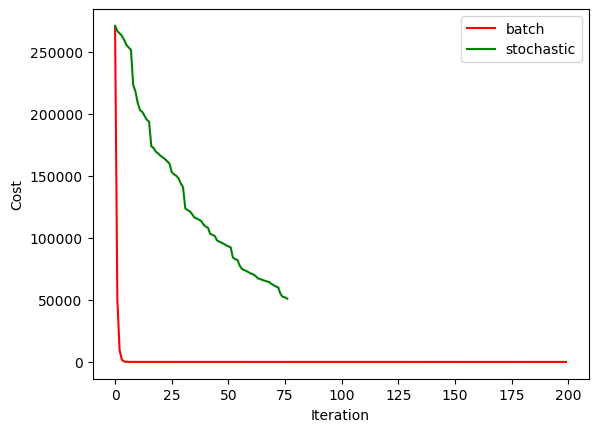

Batch Gradient Descent: 0.0
Stochastic Gradient Descent: 50934.70422443829


In [65]:
plt.plot(np.arange(max_iterations), cost_batch, color = 'red', label='batch')
plt.plot(np.arange(len(cost)), cost, color = 'green', label='stochastic')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

print("Batch Gradient Descent: " +  str(np.min(cost_batch)))
print("Stochastic Gradient Descent: " +  str(np.min(cost)))

* Based on the graph and cost values, we can see that the Batch GD converges faster as well

**Finally, we can determine the most optimal learning rate**

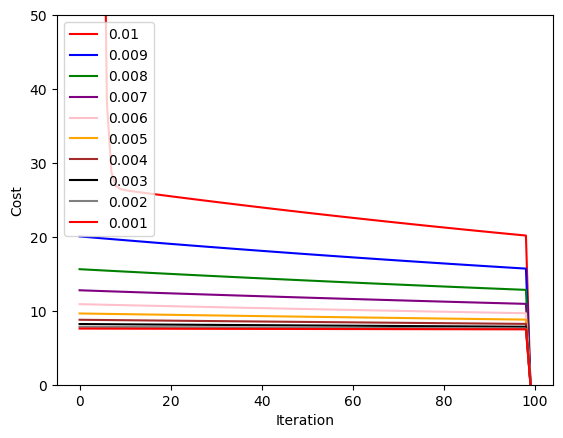

In [100]:
theta = np.array([20.0, 80.0])
max_iterations = 100

alpha_batch = [0.01, 0.009, 0.008, 0.007, 0.006,0.005,0.004,0.003,0.002, 0.001]
res_cost_batch,res_cost_stoch = [],[]

for i in alpha_batch: 
    batch_equation, cost_batch, params_store_batch = batch_gd(x_train, y_train, theta, i, max_iterations, "no")
    stoch_equation, cost_stoch, params_store = stochastic_gd(x_train, y_train, theta, alpha_stoch, "no")
    res_cost_batch.append(cost_batch)
    res_cost_stoch.append(cost_stoch)
    
    
plt.plot(np.arange(max_iterations), res_cost_batch[0], color = 'red', label='0.01')
plt.plot(np.arange(max_iterations), res_cost_batch[1], color ='blue', label='0.009')
plt.plot(np.arange(max_iterations), res_cost_batch[2], color ='green', label='0.008')
plt.plot(np.arange(max_iterations), res_cost_batch[3], color ='purple', label='0.007')
plt.plot(np.arange(max_iterations), res_cost_batch[4], color ='pink', label='0.006')
plt.plot(np.arange(max_iterations), res_cost_batch[5], color ='orange', label='0.005')
plt.plot(np.arange(max_iterations), res_cost_batch[6], color ='brown', label='0.004')
plt.plot(np.arange(max_iterations), res_cost_batch[7], color ='black', label='0.003')
plt.plot(np.arange(max_iterations), res_cost_batch[8], color ='grey', label='0.002')
plt.plot(np.arange(max_iterations), res_cost_batch[9], color ='red', label='0.001')

plt.ylim(0,50 )

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

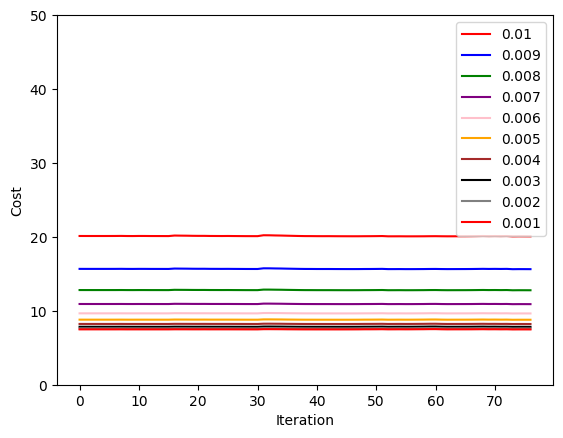

In [102]:
# Plot stochastic learning rate 
plt.plot(np.arange(len(cost)), res_cost_stoch[0], color ='red', label='0.01')
plt.plot(np.arange(len(cost)), res_cost_stoch[1], color ='blue', label='0.009')
plt.plot(np.arange(len(cost)), res_cost_stoch[2], color ='green', label='0.008')
plt.plot(np.arange(len(cost)), res_cost_stoch[3], color ='purple', label= '0.007')
plt.plot(np.arange(len(cost)), res_cost_stoch[4], color ='pink', label='0.006')
plt.plot(np.arange(len(cost)), res_cost_stoch[5], color ='orange', label='0.005')
plt.plot(np.arange(len(cost)), res_cost_stoch[6], color ='brown', label= '0.004')
plt.plot(np.arange(len(cost)), res_cost_stoch[7], color ='black', label= '0.003')
plt.plot(np.arange(len(cost)), res_cost_stoch[8], color ='grey', label= '0.002')
plt.plot(np.arange(len(cost)), res_cost_stoch[9], color ='red', label= '0.001')


plt.ylim(0,50) 

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

* Based on the graphs, the most optimal learning rate is around 0.002